In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

=== Instagram Comments Analysis Summary ===
Total comments: 7488
Total unique users: 77
Total photos commented: 257
Comments with emojis: 3744
Comments without emojis: 3744


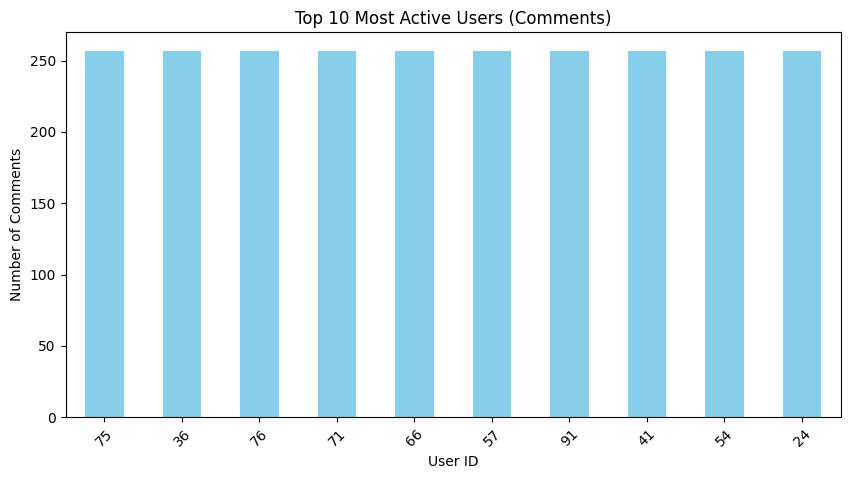

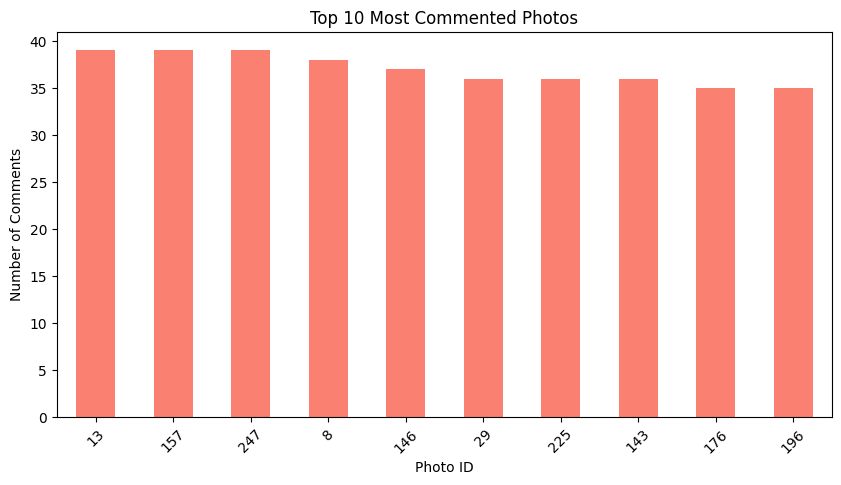

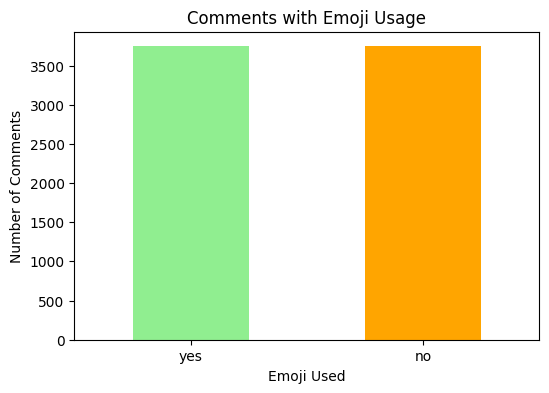

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


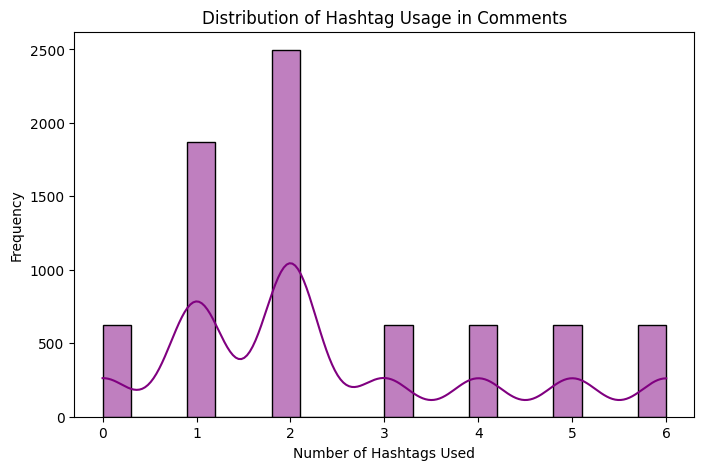

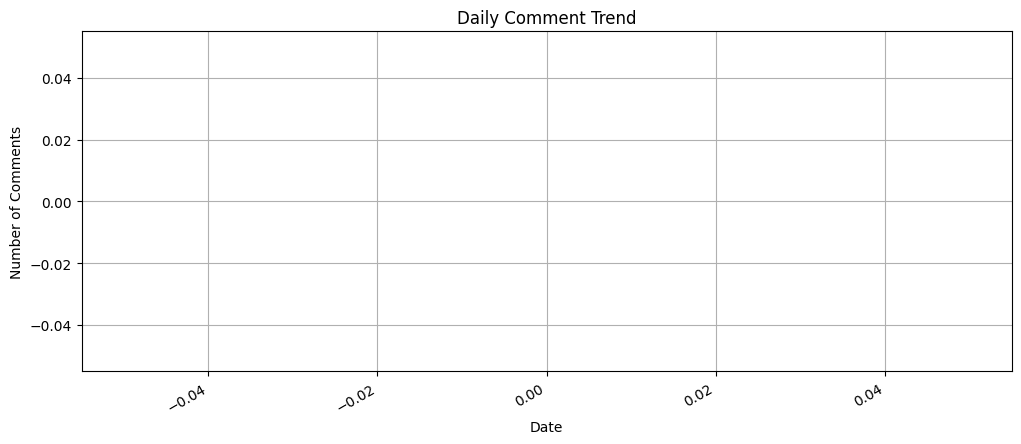

In [1]:
# ============================================
# Instagram Comments Analysis - Internship Task 3
# ============================================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load CSVs
comments = pd.read_csv("/kaggle/input/instgram/comments.csv")
follows = pd.read_csv("/kaggle/input/instgram/follows.csv")
likes = pd.read_csv("/kaggle/input/instgram/likes.csv")
photo_tags = pd.read_csv("/kaggle/input/instgram/photo_tags.csv")
photos = pd.read_csv("/kaggle/input/instgram/photos.csv")
tags = pd.read_csv("/kaggle/input/instgram/tags.csv")
users = pd.read_csv("/kaggle/input/instgram/users.csv")

# Step 3: Clean column names
# Replace multiple spaces with single underscore
comments.columns = [col.strip().lower().replace(' ', '_').replace('__','_') for col in comments.columns]

# Step 4: Convert datetime columns
comments['created_timestamp'] = pd.to_datetime(comments['created_timestamp'], dayfirst=True, errors='coerce')
comments['posted_date'] = pd.to_datetime(comments['posted_date'], errors='coerce')

# Step 5: Basic Summary
emoji_counts = comments['emoji_used'].value_counts()
print("=== Instagram Comments Analysis Summary ===")
print(f"Total comments: {len(comments)}")
print(f"Total unique users: {comments['user_id'].nunique()}")
print(f"Total photos commented: {comments['photo_id'].nunique()}")
print(f"Comments with emojis: {emoji_counts.get('yes',0)}")
print(f"Comments without emojis: {emoji_counts.get('no',0)}")

# Step 6: Top 10 Most Active Users
top_users = comments['user_id'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_users.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Active Users (Comments)")
plt.xlabel("User ID")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.show()

# Step 7: Top 10 Most Commented Photos
top_photos = comments['photo_id'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_photos.plot(kind='bar', color='salmon')
plt.title("Top 10 Most Commented Photos")
plt.xlabel("Photo ID")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.show()

# Step 8: Emoji Usage
plt.figure(figsize=(6,4))
emoji_counts.plot(kind='bar', color=['lightgreen','orange'])
plt.title("Comments with Emoji Usage")
plt.xlabel("Emoji Used")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()

# Step 9: Hashtag Usage Distribution
plt.figure(figsize=(8,5))
sns.histplot(comments['hashtags_used_count'], bins=20, kde=True, color='purple')
plt.title("Distribution of Hashtag Usage in Comments")
plt.xlabel("Number of Hashtags Used")
plt.ylabel("Frequency")
plt.show()

# Step 10: Daily Comment Trend
daily_comments = comments.groupby('posted_date').size()
plt.figure(figsize=(12,5))
daily_comments.plot(color='blue')
plt.title("Daily Comment Trend")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.show()
